In [1]:
import os
import cv2
from matplotlib import pyplot as plt
import math
import numpy as np
from grids import grid_4, grid_11, grid_15, plot_keypoints

import mediapipe as mp
mp_face_mesh = mp.solutions.face_mesh

## Test images

In [2]:
image_files = os.listdir('images')
uploaded = ['images/'+i for i in image_files]

# Read images with OpenCV.
images = {name: cv2.imread(name) for name in uploaded}

uploaded

['images/3.jpg',
 'images/360_F_245563558_XH9Pe5LJI2kr7VQuzQKAjAbz9PAyejG1.jpg',
 'images/c573e9df37d0c494c66abc571d35f27c.png',
 'images/front-view-of-man-s-face.jpg',
 'images/istockphoto-1278139568-170667a.jpg',
 'images/leo.jpg',
 'images/man.jpg',
 'images/photo-1597223557154-721c1cecc4b0.jfif',
 'images/photo_2023-02-24_01-57-09.jpg',
 'images/woman.jpg']

In [21]:
DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480
def resize_and_show(image):
    h, w = image.shape[:2]
    if h < w:
        img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
    else:
        img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
    RGB_im = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.axis('off')
    plt.imshow(RGB_im)
    plt.show()

In [12]:
result_list = []

# Run MediaPipe Face Mesh.
with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    refine_landmarks=True,
    max_num_faces=2,
    min_detection_confidence=0.5) as face_mesh:
    for name, image in images.items():
        # Convert the BGR image to RGB and process it with MediaPipe Face Mesh.
        results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        # Draw face landmarks of each face.
        print(f'Face landmarks of {name}:')
        if not results.multi_face_landmarks:
            continue
        
        annotated_image = image.copy()
    #     annotated_image = grid_15(annotated_image, results)
        annotated_image = grid_11(annotated_image, results)
    #     annotated_image = grid_4(annotated_image, results)

        result_list.append(results)
        
        
#         resize_and_show(annotated_image)

Face landmarks of images/3.jpg:
ratio: 1.8055555555555556
Face landmarks of images/360_F_245563558_XH9Pe5LJI2kr7VQuzQKAjAbz9PAyejG1.jpg:
ratio: 1.2950819672131149
Face landmarks of images/c573e9df37d0c494c66abc571d35f27c.png:
ratio: 1.7527272727272727
Face landmarks of images/front-view-of-man-s-face.jpg:
ratio: 1.5938864628820961
Face landmarks of images/istockphoto-1278139568-170667a.jpg:
ratio: 1.5208333333333333
Face landmarks of images/leo.jpg:
ratio: 1.824390243902439
Face landmarks of images/man.jpg:
ratio: 1.6510416666666667
Face landmarks of images/photo-1597223557154-721c1cecc4b0.jfif:
ratio: 1.86096256684492
Face landmarks of images/photo_2023-02-24_01-57-09.jpg:
ratio: 1.6266666666666667
Face landmarks of images/woman.jpg:
ratio: 1.6637931034482758


## Keypoints

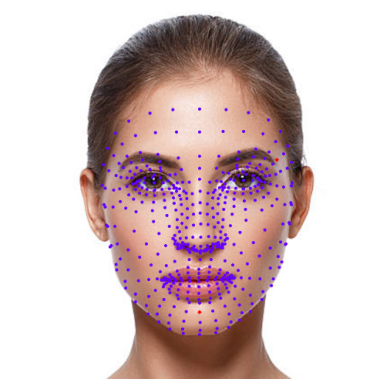

In [7]:
annotated_image = plot_keypoints(image, results, [200, 300])
resize_and_show(annotated_image)